# Oppgave 5: Diskrete beregninger
## 5.1
### a)
Mønsteret i rekka er slik at neste ledd er lik 1/3 av foregående ledd. Det er umulig å summere alle tallene på en datamaskin, men vi kan summere et stort antall ledd, f.eks. 10 000. Hvis vi kjører programmet for ulike verdier av _N_, ser vi at vi får samme sum uansett om vi velger N lik 100, 1000, 10 000 eller 100 000. Det holder altså faktisk å summere 100 ledd!

In [13]:
x0 = 3
N = 100
x = x0
s = x0

for i in range(1,N):
    x = x*1/3
    s = s + x

print(f'Summen er {s}')


Summen er 4.499999999999999


## 5.2

### b)

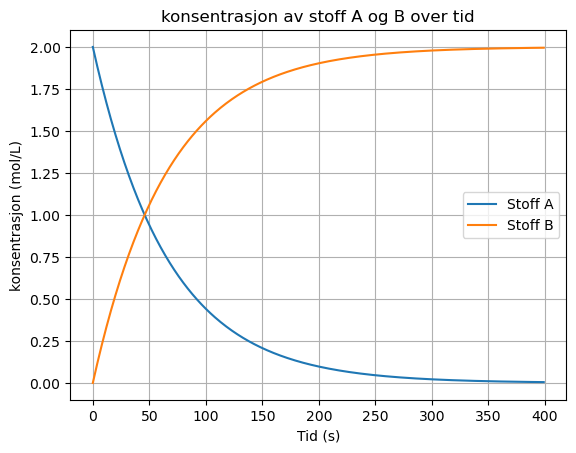

In [2]:
import matplotlib.pyplot as plt

konsA = 2                    #Startkonsentrasjon av stoff A
konsB = 0                    #Startkonsentrasjon av stoff A
rate = 0.015                 #Ratekonstant for reaksjonen
tid_slutt = 400                    #Antall tidsenheter

konsentrasjon_A = [konsA]    # Liste for konsentrajon av stoff A, med startverdi
konsentrasjon_B = [konsB]    # Liste for konsentrajon av stoff B, med startverdi
tid = [0]                    # Liste for tid

for i in range(1,tid_slutt):         
    konsB = konsB + konsA*rate    #Endring i konsentrasjon av stoff B
    konsA = konsA - konsA*rate    #Endring i konsentrasjon av stoff B
    konsentrasjon_A.append(konsA) #Legger konsentrasjon av A i liste
    konsentrasjon_B.append(konsB) #Legger konsentrasjon av B i liste
    tid.append(i)                 #Legger tid i liste

#Plotter resultatene
plt.plot(tid, konsentrasjon_A, label ="Stoff A")
plt.plot(tid, konsentrasjon_B, label ="Stoff B")
plt.xlabel("Tid (s)")
plt.ylabel("Konsentrasjon (mol/L)")
plt.title("Konsentrasjon av stoff A og B over tid")
plt.grid()
plt.legend()
plt.show()

### d)

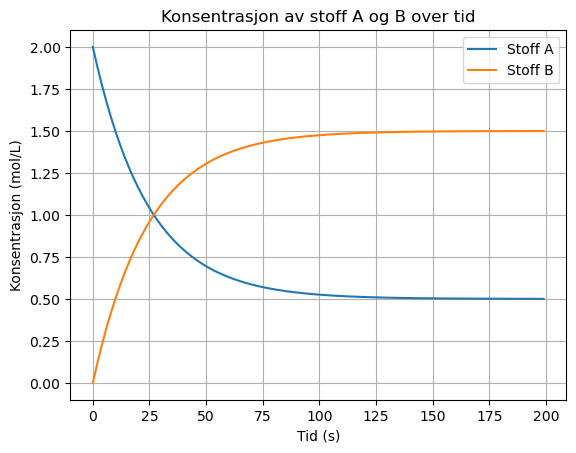

In [4]:
import matplotlib.pyplot as plt

konsA = 2
konsB = 0
dkonsA = 0
dkonsB = 0
rate1 = 0.03                               #Ratekonstant A-->B
rate2 = 0.01                               #Ratekonstant B-->A
tid = 200

konsentrasjon_A = [konsA]
konsentrasjon_B = [konsB]
tid = [0]

for i in range(1,200):
    dkonsB = konsA*rate1 - konsB*rate2     #Regner ut endringene i konsentrasjon først
    dkonsA = konsB*rate2 - konsA*rate1
    konsA = konsA + dkonsA
    konsB = konsB + dkonsB
    konsentrasjon_A.append(konsA)
    konsentrasjon_B.append(konsB)
    tid.append(i)
    
#Plotter resultatene
plt.plot(tid, konsentrasjon_A, label ="Stoff A")
plt.plot(tid, konsentrasjon_B, label ="Stoff B")
plt.xlabel("Tid (s)")
plt.ylabel("Konsentrasjon (mol/L)")
plt.title("Konsentrasjon av stoff A og B over tid")
plt.grid()
plt.legend()
plt.show()

## 5.3

In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt

def e_taylor(x, n):
    e_approks = 0
    for i in range(n):
        e_approks += x**i/math.factorial(i)
    return e_approks

### b)

In [71]:

x = 5
for i in range(1,11):
    e_approks = e_taylor(x,i)
    e_exp = np.exp(x)
    e_feil = abs(e_approks - e_exp)
    print(f'{i} ledd i Taylor-tilnærming: \n numerisk = {e_approks}, analytisk = {e_exp}, feil = {e_feil}')

1 ledd i Taylor-tilnærming: 
 numerisk = 1.0, analytisk = 148.4131591025766, feil = 147.4131591025766
2 ledd i Taylor-tilnærming: 
 numerisk = 6.0, analytisk = 148.4131591025766, feil = 142.4131591025766
3 ledd i Taylor-tilnærming: 
 numerisk = 18.5, analytisk = 148.4131591025766, feil = 129.9131591025766
4 ledd i Taylor-tilnærming: 
 numerisk = 39.33333333333333, analytisk = 148.4131591025766, feil = 109.07982576924327
5 ledd i Taylor-tilnærming: 
 numerisk = 65.375, analytisk = 148.4131591025766, feil = 83.0381591025766
6 ledd i Taylor-tilnærming: 
 numerisk = 91.41666666666667, analytisk = 148.4131591025766, feil = 56.99649243590993
7 ledd i Taylor-tilnærming: 
 numerisk = 113.11805555555556, analytisk = 148.4131591025766, feil = 35.29510354702104
8 ledd i Taylor-tilnærming: 
 numerisk = 128.61904761904762, analytisk = 148.4131591025766, feil = 19.79411148352898
9 ledd i Taylor-tilnærming: 
 numerisk = 138.30716765873015, analytisk = 148.4131591025766, feil = 10.105991443846449
10 l

### c)

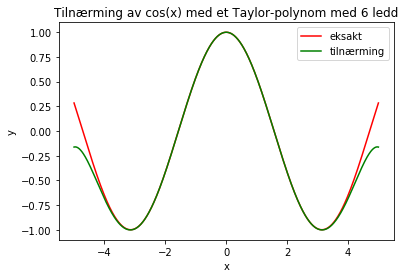

In [77]:
def cos_taylor(x,n):
    cos_approks = 0
    for i in range(n):
        koeffisient = (-1)**i
        teller = x**(2*i)
        nevner = math.factorial(2*i)
        cos_approks += koeffisient*teller/nevner
    return cos_approks

ledd = 6
x = np.linspace(-5,5,1000)
cos_est = cos_taylor(x,6)
cos_eksakt = np.cos(x)

plt.plot(x,cos_eksakt,color='red',label='eksakt')
plt.plot(x,cos_est,color='green',label='tilnærming')
plt.title(f'Tilnærming av cos(x) med et Taylor-polynom med {ledd} ledd')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### d)

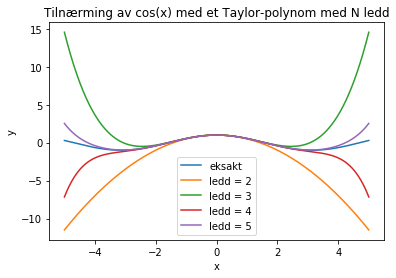

In [84]:
plt.title(f'Tilnærming av cos(x) med et Taylor-polynom med N ledd')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,cos_eksakt,label='eksakt')
x = np.linspace(-5,5,1000)

for ledd in range(2,6):
    cos_est = cos_taylor(x,ledd)
    plt.plot(x,cos_est, label=f'ledd = {ledd}')
plt.legend()
plt.show()